# Simulation Study: Ice Cream Shop Optimization <span style="float: right;"><img src="https://lh3.googleusercontent.com/p/AF1QipMeaLk581-wr392c57SZmLjheinlrOUAc0sYE62=s1360-w1360-h1020-rw" alt="Title Image" style="width:100px; height:130px;"></span>


Group:
* Sonia Bronner, Mat: 2654329 (github: soniabronner)
* Luisa Dosch, Mat: 2777143 (github: luisadosch)

In [1]:
import simpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



## 1. Problem Statement

### **What‘s the best configuration of the ice cream shop, so that the waiting time and overall queue length is reduced and a maximum of customers can be served?**


We want to maximize the revenue of the ice cream shop at the Mainbrücke. We want to maximize that by maximizing the throughput of the shop. The throughput can be maximized by reducing the waiting time of the customers, so more ice cream can be sold in less time. Furthermore, reducing the overall queue length helps in attracting customers, as some customers can be put off by overextensive queue lengths. This means for us : reduce the waiting time of the customers, therefore reduce the queue length, therefore server more customers in a day, therefore sell more ice cream and therefore increase the throughput.


We tracked the Customer Arrival times and the time it takes to serve each customer. 

### Scope and Objectives of the Simulation Study

#### Objectives
- **Primary Objective:** 
  - Determine the optimal configuration of the ice cream shop to ensure that the customer waiting time is minimized to maximize the number of customers served in an hour.
- **Secondary Objective:** 
  - Maximize the revenue of the ice cream shop by maximizing the throughput (number of customers served).

### Boundaries of the System Under Study

#### System Definition
- **Location:** Ice cream shop at the Mainbrücke.
- **Operational Hours:** We focused our observation on 24.06.24 from 13.00 - 14.00
- **Customer Interaction:** From the moment a customer arrives until they are served and leave.

#### System Components
- **Customer Arrival:** Modeled based on tracked arrival times.
- **Service Process:** Includes order taking, ice cream preparation, and payment process.
- **Service Time:** Based on tracked data of how long it takes to serve each customer (from the customer arrival until the customer leaves) .

### Eliminate Exogenous Factors

#### Assumptions to Simplify the System
- **Ice Cream Flavors:** All flavors are chosen equally; for simplicity, assume there is only one flavor.
- **Seasonality:** The study is limited to the summer season, as this is the peak time for ice cream sales. It is also limited to the specific day and time of observation.

#### Additional Considerations
- **Customer Behavior:** Customers arrive independent of each other.
- **External Factors:** Factors such as weather conditions, events, and promotions are not considered, assuming a steady inflow of customers.


## 2. Model Conceptualization

### Performance Characteristics (Measures of Effectiveness)
- **Waiting Time** The time it takes from the customer arrival until he leaves.

### Input Variables Relevant to the Objectives
- **Service Time:** The time it takes for the customer to be served (Order & Pay)
- **Customer Inter Arrival Time:** The frequency at which customers arrive at the shop.
- **Number of Cashiers:** The number of staff members available to serve customers.



## 3. Data Collection

### Data Overview and Data Analysing 

In [2]:
# Read the csv file (it was converted to a csv file from an excel file)
df = pd.read_csv('data_ice_cream_shop.csv')

In [3]:
# Convert the Customer_Arrival_Time, Customer_Leave_Time and Service_Start_Time to datetime objects
df['Customer_Arrival_Time'] = pd.to_datetime(df['Customer_Arrival_Time'])
df['Customer_Leave_Time'] = pd.to_datetime(df['Customer_Leave_Time'])

In [4]:
df

,Customer_Arrival_Time,Customer_Leave_Time,Cashiers
0,2024-06-24 13:22:00,2024-06-24 13:23:50,1
1,2024-06-24 13:22:30,2024-06-24 13:24:24,1
2,2024-06-24 13:24:05,2024-06-24 13:25:00,1
3,2024-06-24 13:25:06,2024-06-24 13:27:00,1
4,2024-06-24 13:25:06,2024-06-24 13:27:00,1
5,2024-06-24 13:26:00,2024-06-24 13:28:03,1
6,2024-06-24 13:27:03,2024-06-24 13:30:10,1
7,2024-06-24 13:27:03,2024-06-24 13:30:10,1
8,2024-06-24 13:30:02,2024-06-24 13:32:04,1
9,2024-06-24 13:30:02,2024-06-24 13:32:04,1


In our dataframe, we observed between 1 to 3 cashiers. The ice cream shop did not have a fixed number of cashiers. Whenever the queue grew longer, an additional staff member would assist, and they would leave once the queue shortened

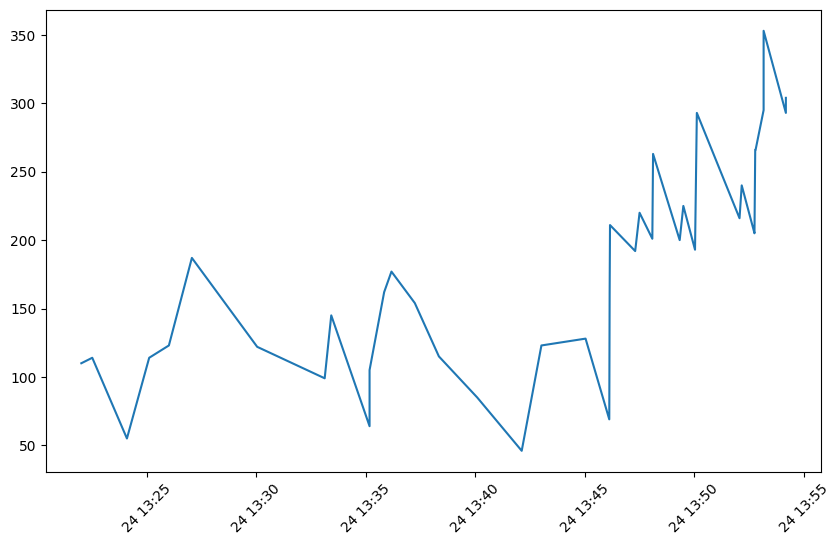

In [5]:
# compute the waiting time (in seconds)

df['WaitingTime'] = (df['Customer_Leave_Time'] - df['Customer_Arrival_Time']).dt.total_seconds()

# Plot waiting time over time
plt.figure(figsize=(10, 6))
plt.plot(df['Customer_Arrival_Time'], df['WaitingTime'])
# Show every minute on the x-axis
plt.xticks(rotation=45)
plt.show()

Here we also see that the waiting time increased over time. This is because in the end of our observation, the queue got longer because more and more people arrived.

In [6]:
#compute inter-arrival time (in seconds)
df['iat'] = (df['Customer_Arrival_Time'] - df['Customer_Arrival_Time'].shift(1)).dt.total_seconds()

# Fill the inter-arrival time of the first customer with the mean of the inter-arrival time
df['iat'].fillna(df['iat'].mean(), inplace=True)
df['iat'] 

0      41.085106
1      30.000000
2      95.000000
3      61.000000
4       0.000000
5      54.000000
6      63.000000
7       0.000000
8     179.000000
9       0.000000
10    185.000000
11     18.000000
12    105.000000
13      0.000000
14     40.000000
15     20.000000
16     64.000000
17     66.000000
18    105.000000
19    122.000000
20     54.000000
21      0.000000
22    121.000000
23     65.000000
24      1.000000
25      0.000000
26      1.000000
27      0.000000
28     69.000000
29      0.000000
30     12.000000
31     35.000000
32      2.000000
33     73.000000
34     10.000000
35     32.000000
36      5.000000
37    117.000000
38      6.000000
39     35.000000
40      0.000000
41      2.000000
42      1.000000
43     22.000000
44      0.000000
45      0.000000
46     61.000000
47      0.000000
Name: iat, dtype: float64

In [7]:
# Compute the service time (in seconds)
st1 = ( df['Customer_Leave_Time'] - df['Customer_Leave_Time'].shift(1)).dt.total_seconds().fillna(40)
st2 = (df['Customer_Leave_Time'] - df['Customer_Arrival_Time']).dt.total_seconds()

# the service time has the elementwise minimum of the two service time calculations
df['ServiceTime'] = np.minimum(st1, st2)

As the dataset shows, we are analyzing the following variables:

- `CustomerArrival`: The time at which the customer arrives at the shop.
- `CustomerLeaveTime`: The time at which the customers leaves the shop.
- `ServiceTime`: The time it takes for the customer to be served (Order & Pay) in seconds
- `WaitingTime`: The time it takes from customer arrival until customer departure in seconds.
- `Cashiers`: The number of cashiers available to serve the customers.
- `Event_Key`: The customer that arrived at the shop.
- `iat`: The time between the arrival of the customers.

In [8]:
# Show the mean waiting time and the mean Service Time
print('Mean waiting time:', df['WaitingTime'].mean())
print("Mean service time:", df['ServiceTime'].mean())

Mean waiting time: 177.875
Mean service time: 42.729166666666664


We can also see that the mean waiting time takes 177.875 seconds (approximately 3 minutes) and the mean service time takes 42.72 seconds.

### Fitting a Distribution


Now we try to fit a distribution for our service time and our inter-arrival time. 

#### Customer Inter Arrival Time (iat)

In [9]:
# Get the mean of the inter-arrival time

mean_inter_arrival_time = df['iat'].mean()

# Calculate the mean inter-arrival time from seconds to minutes
mean_inter_arrival_time = mean_inter_arrival_time/60

print("The average inter-arrival time is: " + str(mean_inter_arrival_time) + " minutes")

The average inter-arrival time is: 0.6847517730496454 minutes


<Axes: xlabel='iat', ylabel='Count'>

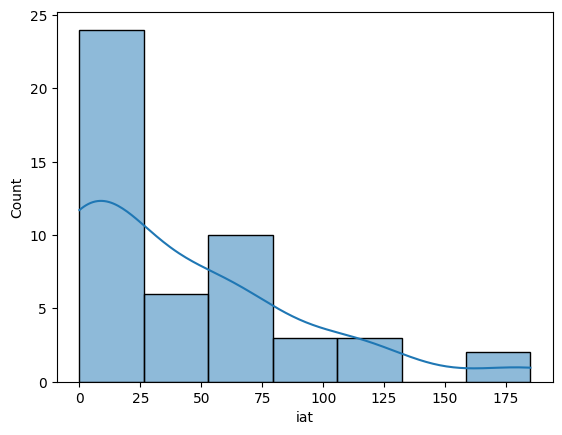

In [10]:
sns.histplot(df['iat'], kde=True)

The measures and plots indicate that most customers arrive quickly after each other. The average time between the arrival of the customers is less than a minute, which shows that there is a constant stream of customers arriving at the shop to buy ice cream.

In [11]:
list_of_potential_distributions = [stats.expon, stats.norm, stats.uniform, stats.gamma]

In [12]:
significance_level = 0.05

results_iat = {}
for dist in list_of_potential_distributions:

    #fit the data to the distribution, and get the parameters, in this case we're using the maximum likelihood estimation (mle)
    dist_parameters_iat = dist.fit(df['iat'], method='mle')

    #evaluate with the kolmogorov-smirnov test
    test_result_iat = stats.kstest(df['iat'], dist.name, args=dist_parameters_iat)

    #save the test results and the parameters
    results_iat[dist.name] = {'test': test_result_iat, 'params': dist_parameters_iat}

    if test_result_iat.pvalue < significance_level:
        print(f'{dist.name} is a "poor" fit')
    else:
        print(f'{dist.name} is a "good" fit')

expon is a "poor" fit
norm is a "poor" fit
uniform is a "poor" fit
gamma is a "poor" fit


We tested good fits for the inter-arrival time. We can see that our inter-arrival time distribution has only poor fits.

([], [])

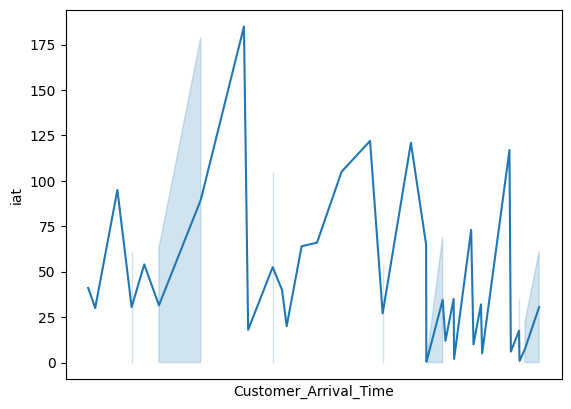

In [13]:
sns.lineplot(x='Customer_Arrival_Time', y='iat', data=df)
plt.xticks([])

There is one point of time where the inter-arrival time changes drastically. This may due to the high demand period, where lots of groups arrived at the shop.


#### Inverse Transform Method (Empirical CDF)

The Inverse Transform Method using the empirical CDF is typically used when there is no specific distribution that fits very well or when one wants to sample directly from the empirical distribution of the data. 
Because our inter arrival time only has poor fits we try to sample directly from the empirical distribution. 

We'd like to sample using the empirical CDF of our customer arrival dataset. For that, we'll implement the Inverse Transform Method.
The Inverse Transform Method is a technique used to generate random samples from our inter-arrival time probability distribution using its cumulative distribution function (CDF). It uses the empirical CDF to generate random samples for our empirical data that follow its distribution, preserving the characteristics observed in the data. 


In [14]:
import empiricaldist



# Create an EmpiricalDist object
iat_ecdf = empiricaldist.Cdf.from_seq(df['iat'])

#### Service Time

<Axes: xlabel='ServiceTime', ylabel='Count'>

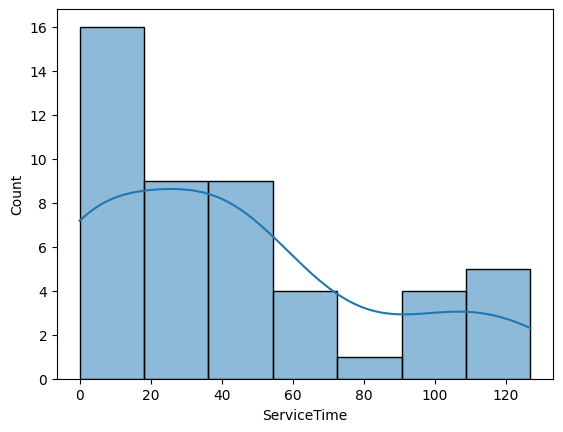

In [15]:
sns.histplot(df['ServiceTime'], kde=True)

##### Relationship between Inter-Arrival Time and Service Time

During our observation of the ice cream shop, we noticed that the inter-arrival time and the service time are not independent of each other. We noticed to things that we want to consider in our simulation model:

* If a lot of customers are at the ice cream shop, the cashier works faster than when the shop is empty. When the shop is empty the cashier works slower and takes more time to serve the customers and has small talk.
* People often arrive in groups of 2-4. Service time is often faster for groups as the cashier can serve multiple customers at once. Often one person pays for the whole group. (Think of a family with kids or a couple)

Our idea is to fit a linear regression model to model the relationship between the inter-arrival time and the service time. 

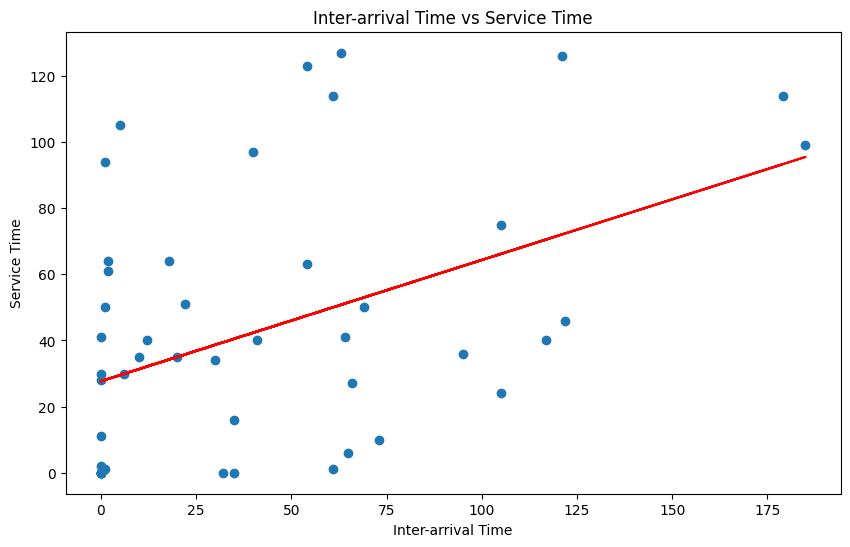

Based on the p-value of 0.0015 there is a significant relationship between the inter-arrival time and the service time


In [16]:
# Plot iat vs service time add a regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['iat'], df['ServiceTime'])
plt.xlabel('Inter-arrival Time')
plt.ylabel('Service Time')
plt.title('Inter-arrival Time vs Service Time')

# Add a regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['iat'], df['ServiceTime'])



plt.plot(df['iat'], intercept + slope*df['iat'], color='red')

# save plot
plt.savefig('linear_regression.png')

plt.show()

if p_value < 0.05:
    print(f"Based on the p-value of {round(p_value, 4)} there is a significant relationship between the inter-arrival time and the service time")

In [17]:
print(f"In the regression line, the slope is {round(slope, 4)} and the intercept is {round(intercept, 4)}")

In the regression line, the slope is 0.3665 and the intercept is 27.6703


Text(0.5, 0, 'Residuals')

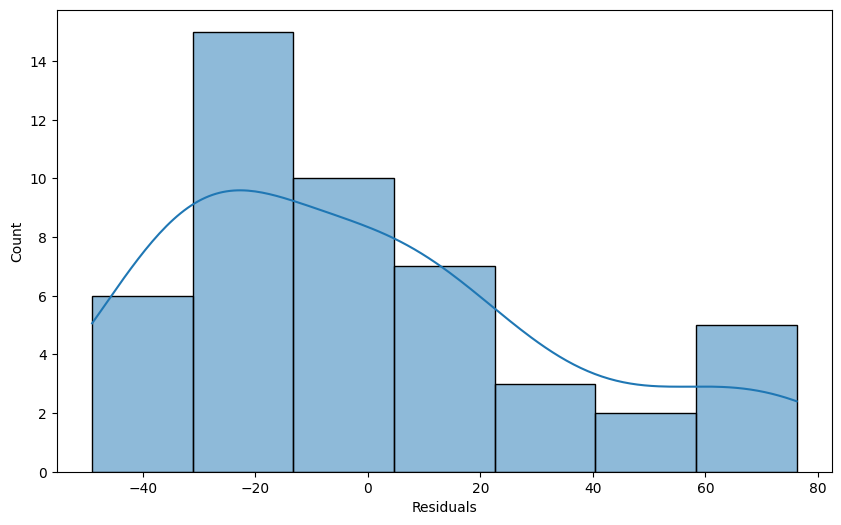

In [18]:
import seaborn as sns

# Get the resiudals
residuals = df['ServiceTime'] - (intercept + slope*df['iat'])

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')

Now we want to verify that a normal distribution is a good fit for the residuals of the linear regression model. 

In [19]:
significance_level = 0.05

results_res = {}
for dist in list_of_potential_distributions:

    #fit the data to the distribution, and get the parameters, in this case we're using the maximum likelihood estimation (mle)
    dist_parameter_res = dist.fit(residuals, method='mle')

    #evaluate with the kolmogorov-smirnov test
    test_result_res = stats.kstest(residuals, dist.name, args=dist_parameter_res)

    #save the test results and the parameters
    results_iat[dist.name] = {'test': test_result_res, 'params': dist_parameter_res}

    if test_result_res.pvalue < significance_level:
        print(f'{dist.name} is a "poor" fit')
    else:
        print(f'{dist.name} is a "good" fit')

expon is a "poor" fit
norm is a "good" fit
uniform is a "poor" fit
gamma is a "good" fit


In [20]:
# Fit a normal distribution on the residuals
residuals_mean, residuals_std = stats.norm.fit(residuals)

print(f'The mean of the residuals is {residuals_mean} and the standard deviation is {residuals_std}')

# Save the coefficients and the residuals standard deviation (ignore mean as mean is 0)
model_st = (intercept, slope, residuals_std)

The mean of the residuals is 2.3684757858670005e-15 and the standard deviation is 34.95491623627879


The regression model is represented by the following equation:

$$ st = b_0 + b_1 \cdot iat + \epsilon  $$

where:
- $st$ is the dependent variable (service time)
- $b_0$ is the intercept  -> in this case 27.67
- $b_1$ is the slope coefficient (regression coefficient for $iat$)
- $iat$ is the independent variable (inter-arrival time)
- $\epsilon $ is the error term (residuals) -> prediction error ~ N(0, 34.95).

meaning

$$ st = 27.67 + 0.37 * iat + \epsilon  $$


**How can we integrate this regression model into our simulation model?**

* First sample an inter-arrival time from the empirical distribution
* Use the linear regression model to predict the service time based on the inter-arrival time 
* Sample noise (prediction error) from a normal  distribution and add it to the predicted service time

## 4. Model Translation (Programming)

### Flowchart of our simulation model

![Flowchart image](Flowchart.jpeg)




### Model Design

##### Entities
- **Customer:** Represents individuals arriving at the ice cream shop to purchase ice cream. Each customer follows a simulated journey from arrival to departure

##### Resources
- **Ice Cream Shop:** Represents the overall simulation environment where customers arrive, order ice cream, and depart
- **Employees/Cashiers:** Represents the employees available to serve customers
- **Ice cream:** The ice cream that is served to the customers


##### Processes
- **Customer Arrival:** Customers arrive at the ice cream shop based on a predefined inter-arrival time distribution (Empirical distribution). Upon arrival, they initiate the process of ordering ice cream
- **Order & Pay:** Once a customer reaches a cashier, they proceed to order their desired ice cream and make a payment. This process involves the service time.

In [21]:
class EventLogger:
    def __init__(self):
        self.logs = []
        self.replication = None  # replication number
        self.seed = None  # seed used for the replication
    
    def set_replication_info(self, replication, seed):
        self.replication = replication
        self.seed = seed

    def log_customer_arrival(self, entity, time, inter_arrival_time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'event_time': time, 'event_name': 'customer_arrival', 'event_key': entity, 
                          'inter_arrival_time': inter_arrival_time})
        

    def log_customer_service_start(self, entity, time, service_time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'event_time': time, 'event_name': 'customer_service_start', 'event_key': entity,
                            'service_time': service_time
                            })

    def log_customer_departure(self, entity, time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'event_time': time, 'event_name': 'customer_departure', 'event_key': entity})

    def get_logs_df(self):
        return pd.DataFrame(self.logs)
    
    def dump_logs_df(self, filepath=None):
        if filepath is None: 
            filepath = "logs.csv"

        self.get_logs_df().to_csv(filepath, index=False)

In [22]:
class IceCreamShop:
    def __init__(self, env, num_cashier, logger=None, threshold_for_2_cashiers=None, threshold_for_3_cashiers=None): 
        self.env = env
        self.resource = simpy.Resource(env, num_cashier) # The simpy Resource has the attributes capacity and queue; here we have a common queue for all cashiers
        self.logger = logger
        self.threshold_for_2_cashiers = threshold_for_2_cashiers
        self.threshold_for_3_cashiers = threshold_for_3_cashiers


    def set_cashiers(self, num_cashier):
        # simpy resource has attribute capacity which can be used to change the number of cashiers
        self.resource._capacity = num_cashier

    
    def adapt_number_of_cashiers(self):
        # Get the length of the queue
        
        queue_length = len(self.resource.queue)


        if queue_length < self.threshold_for_2_cashiers:
            self.set_cashiers(1) # If the queue length is less than the threshold, the number of cashiers is 1
        elif queue_length >= self.threshold_for_2_cashiers and queue_length < self.threshold_for_3_cashiers:
            self.set_cashiers(2) # If the queue length is less than the threshold for  3 cashiers, but more than the threshold for 2 cashiers, the number of cashiers is 2
        else:
            self.set_cashiers(3) # If the queue length is more than the threshold for 3 cashiers, the number of cashiers is 3


    def serve_customer(self, service_time):
            
            if self.threshold_for_2_cashiers is not None and self.threshold_for_3_cashiers is not None:
                self.adapt_number_of_cashiers()
        
            yield self.env.timeout(service_time)

    




In [23]:
class Customer:
    def __init__(self, env, name, ice_cream_shop, logger, service_time):
        self.env = env
        self.name = name
        self.logger = logger
        self.service_time = service_time

        self.env.process(self.visit_shop(ice_cream_shop))

    def visit_shop(self, ice_cream_shop):
        
        with ice_cream_shop.resource.request() as request:
            yield request
            
            # Log the start of service time
            self.logger.log_customer_service_start(self.name, self.env.now, self.service_time)
            yield self.env.process(ice_cream_shop.serve_customer(self.service_time))

            # Log the departure time
            self.logger.log_customer_departure(self.name, self.env.now)
            

#### Entity Generator

- Generator of Customers arriving at Shop, generates customers based on specified distributions for inter-arrival times. Customers are dynamically introduced into the simulation environment, creating a realistic flow of foot traffic within the ice cream shop. This class ensures that the simulation reflects varying customer arrival patterns, crucial for evaluating operational efficiency and customer service.

In [24]:
def sample_st(inter_arrival_time, model_st):
        

        intercept, slope, residuals_std = model_st

        # Predict the service time based on the inter-arrival time (linear regression)
        predicted_service_time = intercept + slope*inter_arrival_time

        # Add randomness to the service time (noise based on the residuals)
        noise = np.random.normal(0, residuals_std)

        service_time = predicted_service_time + noise

        # If the service time is negative or zero, set it to zero
        if service_time < 0:
            service_time = 0

        return inter_arrival_time, service_time

In [25]:
def sample_iat_and_st(iat_ecdf,model_st):
        
        # Sample the inter-arrival time from the empirical CDF
        inter_arrival_time = iat_ecdf.sample(n=1)[0]
        
        # Sample the service time based on the inter-arrival time
        inter_arrival_time, service_time = sample_st(inter_arrival_time, model_st)

        return inter_arrival_time, service_time



In [26]:
class CustomerGenerator:
    def __init__(self, env, ice_cream_shop, logger, iat_ecdf, model_st):
        self.env = env
        self.ice_cream_shop = ice_cream_shop
        self.logger = logger
        self.iat_ecdf = iat_ecdf # Empirical CDF of the inter-arrival time
        self.model_st = model_st # Model for the service time
        self.customer_count = 0
        self.env.process(self.customer_generator())


    def sample_iat_and_st(self):
        return sample_iat_and_st(self.iat_ecdf, self.model_st)


    def customer_generator(self):

        while True:

            # Increase the customer count
            self.customer_count += 1
            
            # Sample the inter-arrival time and service time
            inter_arrival_time, service_time = self.sample_iat_and_st()

            # Time out based on the inter-arrival time
            yield self.env.timeout(inter_arrival_time)

            name = f'Customer_{self.customer_count}'
            self.logger.log_customer_arrival(name, self.env.now, inter_arrival_time)

            # create a new customer
            Customer(self.env, name, self.ice_cream_shop, self.logger, service_time)
                
     
                        


#### Run Simulation

In [27]:
# Simulation parameters
SIM_TIME = 60  # Simulation time in minutes
N_REPLICATIONS = 100  # Number of replications
THRESHOLD_2 = 5  # Threshold for adding second cashier
THRESHOLD_3 = 9 # Threshold for adding third cashier

# Set seed for reproducibility
np.random.seed(42)

pool_of_seeds = [i for i in range(1, 100000)]  # List of seeds to be used for the replications

# Shuffle the pool of seeds
np.random.shuffle(pool_of_seeds)


# Setup and start the simulation
print('Running Simulation...')

# Define the logger (same for all replications)
logger = EventLogger()



# Get a list of seeds of length N_REPLICATIONS from a pool of seeds.
# Set replace=False to ensure that we don't reuse the same seed twice.
list_of_seeds = pool_of_seeds[:N_REPLICATIONS]
list = range(1, N_REPLICATIONS)


# Run each replication
for i, seed in enumerate(list_of_seeds):
    print(f'Running Replication {i} with seed: {seed} ...')
    
    # Set random seed
    np.random.seed(seed)

    # Set replication id and random seed in logger
    logger.set_replication_info(i, seed)

     ######################################
    ############## SYSTEM 1 ##############
    ######################################

    # Create an environment and start the setup process
    env = simpy.Environment()
    
    # define resources
    ice_cream_shop = IceCreamShop(env, 1, logger, THRESHOLD_2, THRESHOLD_3)

    # define processes

    customer_generator = CustomerGenerator(
        env, ice_cream_shop, logger, iat_ecdf, model_st
        )
    
    # Execute
    env.run(until=SIM_TIME*60)


print('... Done')

Running Simulation...
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...
Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...
Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 w

## 5. Verification & Validation

### Analysing the simulation results

We start by getting an overview of the logs we received from the ice cream simulation. We will use those logs to compare the results of our simulation model with the real data.

In [28]:
events_df = logger.get_logs_df()

events_df

,replication_id,seed,event_time,event_name,event_key,inter_arrival_time,service_time
0,0,26003,35.000000,customer_arrival,Customer_1,35.0,NaN
1,0,26003,35.000000,customer_arrival,Customer_2,0.0,NaN
2,0,26003,35.000000,customer_service_start,Customer_1,NaN,0.000000
3,0,26003,35.000000,customer_arrival,Customer_3,0.0,NaN
4,0,26003,35.000000,customer_departure,Customer_1,NaN,NaN
...,...,...,...,...,...,...,...
25182,99,71222,3535.255319,customer_arrival,Customer_84,54.0,NaN
25183,99,71222,3547.775398,customer_departure,Customer_81,NaN,NaN
25184,99,71222,3547.775398,customer_service_start,Customer_82,NaN,47.904807
25185,99,71222,3595.680205,customer_departure,Customer_82,NaN,NaN


We format the output of the simulation and calculate  the waiting time. 
The results dataframe now contains the following columns: `arrival_time`, `service_start_time`, `departure_time`, `service_time` and `waiting_time`.


In [29]:
def format_events_df(events_df):
    # Create a copy of the original dataframe
    results_df = events_df[events_df['event_name'] == 'customer_arrival'][['event_key', 'event_time', 'replication_id']].rename(columns={'event_time': 'arrival_time'})
    # Set as index the customer name and the replication id
    results_df = results_df.set_index(['event_key', 'replication_id'])

    service_start_event_times = events_df[events_df['event_name'] == 'customer_service_start'][['event_key', 'event_time', 'replication_id']].rename(columns={'event_time': 'service_start_time'})
    service_start_event_times = service_start_event_times.set_index(['event_key', 'replication_id'])
    results_df = results_df.join(service_start_event_times)

    departure_event_times = events_df[events_df['event_name'] == 'customer_departure'][['event_key', 'event_time', 'replication_id']].rename(columns={'event_time': 'departure_time'})
    departure_event_times = departure_event_times.set_index(['event_key', 'replication_id'])
    results_df = results_df.join(departure_event_times)

    # Add service time column to the results_df
    service_time = results_df['departure_time'] - results_df['service_start_time']
    results_df['service_time'] = service_time
    # Add the waiting time column to the results_df
    waiting_time = results_df['departure_time'] - results_df['arrival_time']
    results_df['waiting_time'] = waiting_time


    # Drop all rows with nan values
    results_df = results_df.dropna()

    return results_df[['arrival_time', 'service_start_time', 'departure_time', 'service_time', 'waiting_time']]

In [30]:
results_df = format_events_df(events_df)
results_df


,,arrival_time,service_start_time,departure_time,service_time,waiting_time
event_key,replication_id,,,,,
Customer_1,0,35.000000,35.000000,35.000000,0.000000,0.000000
Customer_2,0,35.000000,35.000000,81.931915,46.931915,46.931915
Customer_3,0,35.000000,81.931915,82.510314,0.578399,47.510314
Customer_4,0,70.000000,82.510314,135.880724,53.370410,65.880724
Customer_5,0,70.000000,135.880724,135.880724,0.000000,65.880724
...,...,...,...,...,...,...
Customer_78,99,3205.255319,3354.104037,3362.363023,8.258986,157.107704
Customer_79,99,3300.255319,3362.363023,3399.319840,36.956817,99.064521
Customer_80,99,3479.255319,3479.255319,3522.031464,42.776145,42.776145


In [31]:
print(f"The mean waiting time is: {results_df['waiting_time'].mean()}") 
print(f"The mean service time is: {results_df['service_time'].mean()}")
print(f"The mean waiting time from the dataset is: {df['WaitingTime'].mean()}")
print(f"The mean service time from the dataset is: {df['ServiceTime'].mean()}")
print(f"The mean inter-arrival time is: {events_df['inter_arrival_time'].mean()}")
print(f"The mean inter-arrival time from the dataset is: {df['iat'].mean()}")


The mean waiting time is: 175.70821276048449
The mean service time is: 45.018829941404505
The mean waiting time from the dataset is: 177.875
The mean service time from the dataset is: 42.729166666666664
The mean inter-arrival time is: 40.98557597943001
The mean inter-arrival time from the dataset is: 41.08510638297872


We see from printing the mean columns that the results of our simulation are very similar to the real data. 

### Comparing the results of the simulation with the real data

To compare the results of our simulation with the real data, we calculate the mean and standard deviation of the customer waiting time for each of the simulation runs (replications).

In [32]:
# Reset both indices and add them as columns to the dataframe
results_df = results_df.reset_index()
within_replication_stats_df = results_df\
    .groupby('replication_id')\
    .agg({
        'waiting_time': ['mean', 'std'],
    })\
    .reset_index(drop=False)
within_replication_stats_df

replication_id waiting_time           
                          mean        std
0               0   238.671505  79.765662
1               1   120.404270  92.928877
2               2   146.721882  86.688361
3               3   163.650405  91.162784
4               4   178.402656  54.834208
..            ...          ...        ...
95             95   190.991825  98.075926
96             96   176.568571  78.023514
97             97   208.643011  89.861599
98             98   159.613527  71.403674
99             99   146.377845  79.938136

[100 rows x 3 columns]

Now we can use the mean and standard deviation to calculate a confidence interval for the waiting time of the customers in our simulation.
The real mean waiting time lies within the confidence interval of the simulated mean waiting time. This is a good sign that our simulation model is valid.

In [33]:
#significance level
alpha = 0.05

#compute mean, std and sample size
sample_size = N_REPLICATIONS
sample_mean = within_replication_stats_df['waiting_time']['mean'].mean()
sample_std = within_replication_stats_df['waiting_time']['mean'].std()

print(f"sample mean: {sample_mean} (simulation mean)")
print(f"sample std: {sample_std} (simulation std)")
print(f"true mean: {df['WaitingTime'].mean()} (data mean)")
print(f"true std: {df['WaitingTime'].std()} (data std)")


#Calculate t confidence interval

# Calculate the t-value for a 95% confidence interval (two-sided)
t_value = stats.t.ppf(1-alpha/2, sample_size - 1) 

# Calculate the half-width of the confidence interval
ci_halfwidth = t_value * sample_std / np.sqrt(sample_size)

#calculate the lower and upper bounds of the confidence interval
ci_lb = sample_mean - ci_halfwidth
ci_ub = sample_mean + ci_halfwidth

print(f"t confidence int: [{ci_lb}, {ci_ub}]") 

sample mean: 174.84548511814705 (simulation mean)
sample std: 28.553088123660984 (simulation std)
true mean: 177.875 (data mean)
true std: 75.02811529757616 (data std)
t confidence int: [169.17993297085812, 180.511037265436]




* The output of the t-confidence interval provides information about the range in which we expect the true mean of the waiting time to lie with 95% confidence, based on our simulation results.

* The fact that the true mean falls within the 95% confidence interval indicates that our simulation model provides a reasonable estimate of the mean waiting time for customers at the ice cream shop.

* However, the confidence interval is relatively wide, suggesting that the model is not very robust as the waiting time fluctuates significantly between replications.

* **Accuracy of the Simulation Model:** based on the conficence interval our model seems to be accurate. 

* **Robustness of the Simulation Model:** The wide confidence interval indicates that the model is not very robust.

Now we will do a Hypothesis test to see if the waiting time of the customers in the simulation is significantly different from the real data.

In [34]:
# Get the mean of the waiting time
mu = df['WaitingTime'].mean()


#perform  t-test (with scipy)
t_stat, p_value = stats.ttest_1samp(within_replication_stats_df['waiting_time']['mean'], mu)
print(t_stat, p_value)

#interpret the test
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the actual measure => Needs to improve the model")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the actual measure => No reason to consider the model invalid")

-1.0610112884225962 0.2912663414737723
Fail to reject the null hypothesis; there is no significant difference between the sample mean and the actual measure => No reason to consider the model invalid


Also based on the t-test we can see that the mean waiting time of the real data is not significantly different from the mean waiting time of the simulated data.

## 6. Experimental Design

### Robustness Check

Now we want to see how our model changes when we change the parameters. We will always compare the outputs of the different mean waiting times.

Our Standard Simulation parameters are:

* SIM_TIME = 60   # Simulation time in minutes
* N_REPLICATIONS = 100  # Number of replications
* THRESHOLD_2 = 5  # Threshold for adding second cashier
* THRESHOLD_3 = 9 # Threshold for adding third cashier

These result in a mean waiting time of 175.70

* **Cashier Thresholds**
    * When increasing the cashier thresholds by one (results in less cashiers), the mean waiting time of the simulation model is 195.30

    * When decreasing the cashier thresholds by one (results in more cashiers), the mean waiting time of the simulation model is: 157.64

    * When increasing and decreasing the cashier thresholds by one the null hypothesis when comparing our mean waiting time to the real data gets rejected which shows that our model is not robust.

* **Simulation Time**

    * When increasing the simulation time by one hour, the mean waiting time of the simulation model is: 181.04

    * When decreasing the simulation time by 30 minutes, the mean waiting time of the simulation model: 157.56 That shows that we have a shorter waiting time when having more cashiers.

    * When increasing the simulation time by one hour, the null hypothesis does not get rejected. But when increasing the simulation time by 4 hours, the null hypothesis gets rejected. When decreasing the simulation time by 30 minutes, the null hypothesis gets rejected.

* **Number of Replicants**

    * When increasing the number of replicants by 500, the mean waiting time of the simulation model is 174.85

    * When decreasing the number of replicants to 5, the mean waiting time of the simulation model is: 170.46
    
    * When increasing the number of replicants by 500, the null hypothesis is rejected. When decreasing the number of replicants to 5, the null hypothesis is accepted.

* When changing the parameters of the threshold of the cashiers in our simulation and comparing it to the real data the null hypothesis is rejected. That shows that our model is not very robust.

* This is probably because when we compare our model to the real data we only have 50 data points. Therefore we would have to collect more data to improve the model.

* The threshold that is significant to the real data is the same threshold we also observed while collecting the data.

* When drastially changing the simulation time the hypothesis is also rejected. The reason for that is that we also only collected the data for one hour.

Overall, our model is not very robust to changes which is because of the limited data. We would have to collect more data to make it more robust to changes.

### Number of Replications

We have run 100 replications of our simulation model and now we'd like to compute how many replications do we need to ensure a specific margin of error in our output measurement.

In [35]:
# save within_replication_stats_df to a csv file
within_replication_stats_df.to_csv('within_replication_stats.csv', index=False)

# read within_replication_stats.csv

replication_results = pd.read_csv('within_replication_stats.csv')

# rename waiting_time to waiting_time_mean
replication_results = replication_results.rename(columns={'waiting_time': 'waiting_time_mean'})

# rename waiting_time.1 to waiting_time_std
replication_results = replication_results.rename(columns={'waiting_time.1': 'waiting_time_std'})

# Ensure waiting_time_mean is numeric
replication_results['waiting_time_mean'] = pd.to_numeric(replication_results['waiting_time_mean'], errors='coerce')

# Drop rows with NaN values in 'waiting_time_mean' if any
replication_results = replication_results.dropna(subset=['waiting_time_mean'])

Analyse the number of replications needed to ensure a specific margin of error in our output measurement with a given confidence level of 95%.


In [36]:
R0 = replication_results['replication_id'].nunique()
s0 = replication_results['waiting_time_mean'].std()
alpha = 0.05

def sample_size_calculator(alpha, epsilon, s0, R0):
    t_value = stats.t.ppf(1-alpha/2, R0 - 1)
    R = round((t_value*s0/epsilon)**2)
    return R

For example, how many replications do we need to ensure a margin of error of 1 in our output measurement with a confidence level of 95%?


In [37]:
sample_size_calculator(alpha, 1, s0, R0)

3210

In this example, we need 3210 replications to ensure a margin of error of 1 in our output measurement with a confidence level of 95%.

In [38]:

#define epsilon and alpha ranges
epsilon_values = [0.1, 0.2, 0.3, 0.5,1,1.5, 2, 4, 6]
alpha_values = [0.05, 0.1,0.15, 0.2, 0.25, 0.3]

data = []

#iterate over epsilon and alpha values
for epsilon in epsilon_values:
    for alpha in alpha_values:
        
        #compute sample size
        try:
            R = sample_size_calculator(alpha, epsilon, s0, R0)
        except OverflowError:
            R = np.nan

        #append results to data
        data.append({'alpha': round(alpha, 2), 'epsilon': round(epsilon, 2), 'sample_size': R})
        
#convert data to DataFrame and pivot
heatmap_df = pd.DataFrame(data)
heatmap_df = heatmap_df.pivot(index="alpha", columns="epsilon", values="sample_size")

heatmap_df

epsilon,0.1,0.2,0.3,0.5,1.0,1.5,2.0,4.0,6.0
alpha,,,,,,,,,
0.05,320985,80246,35665,12839,3210,1427,802,201,89
0.10,224764,56191,24974,8991,2248,999,562,140,62
0.15,171599,42900,19067,6864,1716,763,429,107,48
0.20,135705,33926,15078,5428,1357,603,339,85,38
0.25,109163,27291,12129,4367,1092,485,273,68,30
0.30,88501,22125,9833,3540,885,393,221,55,25


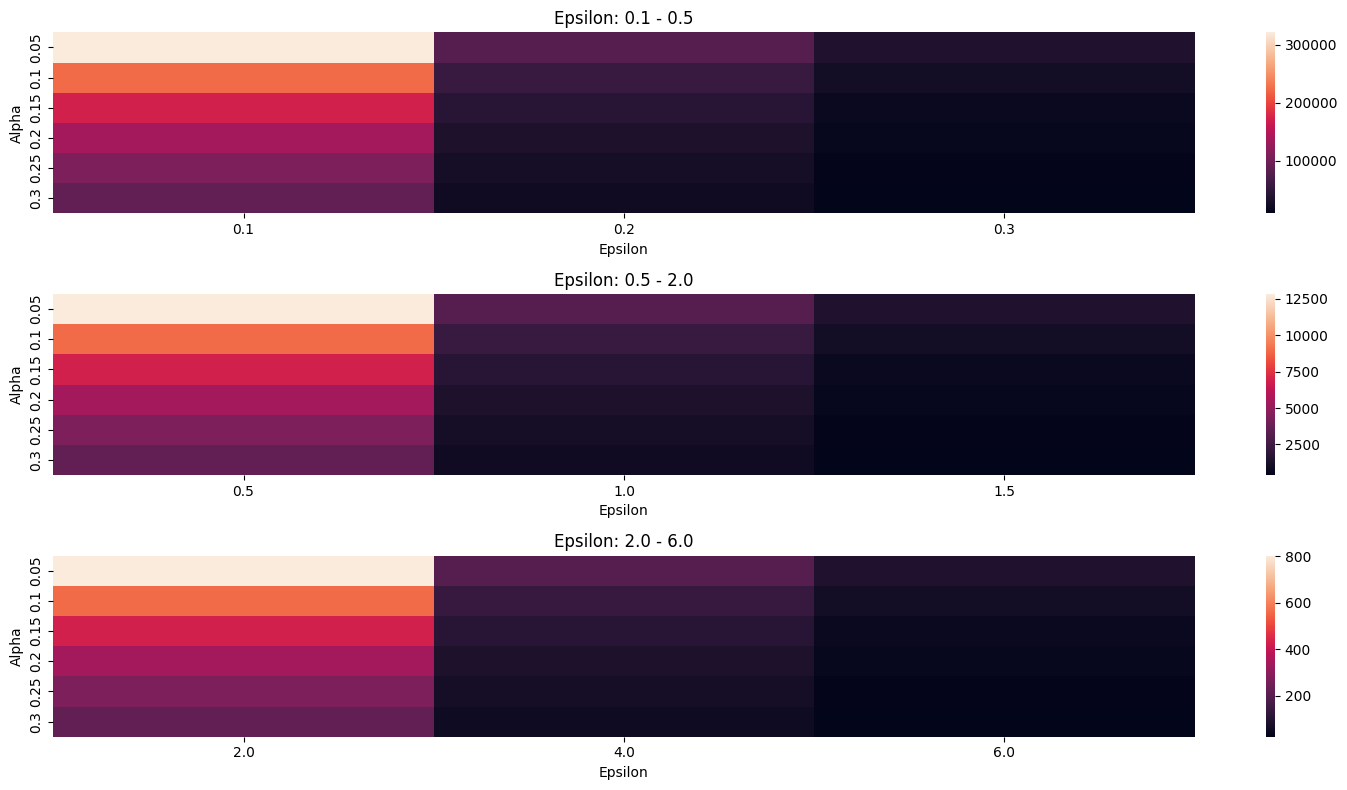

In [39]:
heatmap_1 = heatmap_df.loc[:, :0.3]
heatmap_2 = heatmap_df.loc[:, 0.5:1.5]
heatmap_3 = heatmap_df.loc[:, 2.0:]



fig, ax = plt.subplots(3, 1, figsize=(15, 8))



sns.heatmap(heatmap_1, ax=ax[0])
ax[0].set_title('Epsilon: 0.1 - 0.5')
ax[0].set_xlabel('Epsilon')
ax[0].set_ylabel('Alpha')

sns.heatmap(heatmap_2, ax=ax[1])
ax[1].set_title('Epsilon: 0.5 - 2.0')
ax[1].set_xlabel('Epsilon')
ax[1].set_ylabel('Alpha')

sns.heatmap(heatmap_3, ax=ax[2])
ax[2].set_title('Epsilon: 2.0 - 6.0')
ax[2].set_xlabel('Epsilon')
ax[2].set_ylabel('Alpha')


plt.tight_layout()
plt.show()



Now we want to look at the number of replications for different significance levels and  $ε$ values.

* To get an error of <0.1 with a significance level of 0.05, we need >300 000 replications.
* To get an error of <0.5 with a significance level of 0.05, we need >12 500 replications.
* To get an error of <2.0 with a significance level of 0.05, we need >800 replications.

Overall, we can summarize:

* If alpha increases, the number of replications needed decreases.
* If the margin of error increases, the number of replications needed decreases.


## 7. Simulation Runs & Analysis

### Analysing our single simulation model

#### Quantile Confidence Interval

We'd like to compute a confidence interval for a a specific quantile of the average waiting time.

Although that the waiting time itself is unlikely to be normally distributed, the average waiting time across a simulation run can be assumed to be normally distributed due to the Central Limit Theorem.

In [40]:
#sort by waiting time mean (ascending)
replication_results = replication_results.sort_values(by='waiting_time_mean', ascending=True)

#create rank column
replication_results['rank'] = np.arange(1, replication_results.shape[0]+1)

In [41]:
import numpy as np
from scipy import stats


def compute_quantile_confidence_interval(replication_results, q):
    """
    Computes the q-th quantile of a normal distribution with given mean and std,
    and the corresponding confidence interval for the quantile at significance level alpha.

    Parameters:
    mean (float): Mean of the normal distribution.
    std (float): Standard deviation of the normal distribution.
    q (float): Quantile to compute (e.g., 0.5 for median).
    alpha (float): Significance level for the confidence interval (default is 0.05).

    Returns:
    quantile (float): The computed quantile.
    conf_interval (tuple): The lower and upper bounds of the confidence interval.
    """

    sample_size = replication_results.shape[0]
    alpha=0.05

        
    z_value = stats.norm.ppf(1-alpha/2)

    #compute quantile lower and upper bounds
    quantile_lb = q - z_value * np.sqrt(q*(1-q)/(sample_size - 1))
    quantile_ub = q + z_value * np.sqrt(q*(1-q)/(sample_size - 1))
    

    #compute the point estimate (now with the quantile function)
    point_estimate = replication_results['waiting_time_mean'].quantile(q)

    #compute the confidence interval (now with the quantile function)
    ci_lb = replication_results['waiting_time_mean'].quantile(quantile_lb)
    ci_ub = replication_results['waiting_time_mean'].quantile(quantile_ub)


    return point_estimate, (ci_lb, ci_ub)


point_estimate, (ci_lb, ci_ub) = compute_quantile_confidence_interval(replication_results, q=0.8)



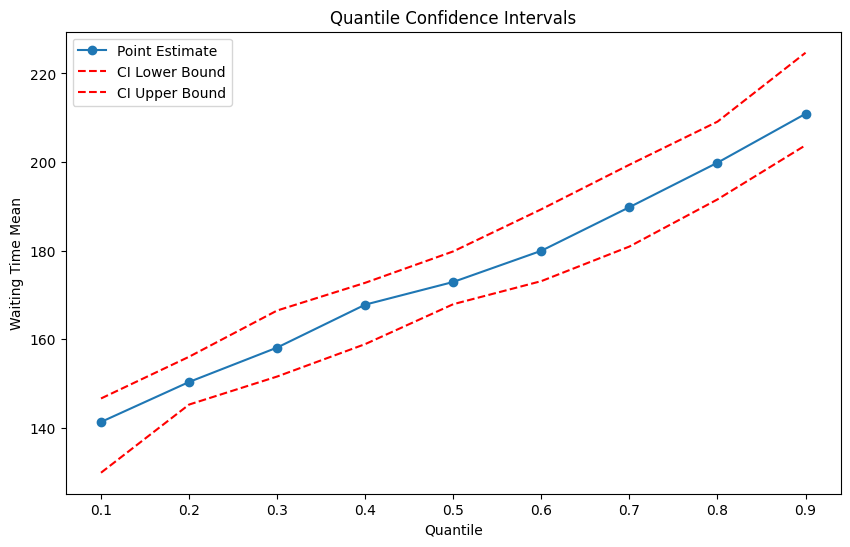

In [42]:
# Create a plot for different quantiles
quantiles = np.arange(0.1, 1.0, 0.1)
point_estimates = []
ci_lbs = []
ci_ubs = []

for quantile in quantiles:
    point_estimate, (ci_lb, ci_ub) = compute_quantile_confidence_interval(replication_results, q=quantile)
    point_estimates.append(point_estimate)
    ci_lbs.append(ci_lb)
    ci_ubs.append(ci_ub)

# Plot the point estimates as a lineplot
plt.figure(figsize=(10, 6))

plt.plot(quantiles, point_estimates, marker='o', label='Point Estimate')

# Plot the confidence intervals as lines
plt.plot(quantiles, ci_lbs, linestyle='--', color='red', label='CI Lower Bound')
plt.plot(quantiles, ci_ubs, linestyle='--', color='red', label='CI Upper Bound')

plt.xlabel('Quantile')
plt.ylabel('Waiting Time Mean')
plt.title('Quantile Confidence Intervals')
plt.legend()

In [43]:
point_estimate, (ci_lb, ci_ub) = compute_quantile_confidence_interval(replication_results, q=0.5)

print(f"Point Estimate of the Median: {point_estimate}")
print(f"Confidence Interval: [{ci_lb}, {ci_ub}]")

Point Estimate of the Median: 172.93745697483487
Confidence Interval: [167.92090778426805, 179.84000339423315]


This visualization can be interpreted as follows: In our modeL:

* The 50% quantile of the average waiting time is estimated to be approx. 173 seconds.  That means that 50% of the average waiting times are below 173 seconds.
* The confidence interval of the 50% quantile is [167.9, 179.8]. This means that we are 95% confident that the true 50% quantile of the average waiting time lies within this interval.


So overall, in our simulation,  the waiting time will be most likely between 140 and 200 seconds

#### Replication Method

Assuming now that our ice cream shop runs  24/7, we're interested in implementing the replication method and differentiating between the transient vs the steady-state phase.

* In a simulation, the **transient state** refers to the period where the system's variables are changing and have not yet reached equilibrium. This phase shows the system's response to initial conditions or disturbances.

* The **steady state** is when the system's variables have stabilized and no longer change with time, indicating that the system has reached equilibrium.

It's important to consider both states because:

* Transient state analysis helps in understanding the system's dynamic behavior and how it responds to changes.

* Steady state analysis provides insights into the long-term performance and stability of the system.

By examining both, we want to ensure the system operates as expected over time and under various conditions.

For this task we'll change the metric to the queue length and we'll monitor it periodically to ensure we have exactly the same sampling frequency among different replications.

In [44]:
class EventLogger_RM:
    def __init__(self):
        self.logs = []
        self.replication = None  # replication number
        self.seed = None  # seed used for the replication
    
    def set_replication_info(self, replication, seed):
        self.replication = replication
        self.seed = seed

    def log_customer_arrival(self, entity, time, inter_arrival_time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'event_time': time, 'event_name': 'customer_arrival', 'event_key': entity, 
                          'inter_arrival_time': inter_arrival_time})
        

    def log_customer_service_start(self, entity, time, service_time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'event_time': time, 'event_name': 'customer_service_start', 'event_key': entity,
                            'service_time': service_time
                            })

    def log_customer_departure(self, entity, time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'event_time': time, 'event_name': 'customer_departure', 'event_key': entity})
        
    def log_queue_length(self, queue_length, time): #NEW
        self.logs.append({'replication_id': self.replication, 'seed': self.seed, #replication info
                          'event_time': time, 'event_name': 'queue_monitor', 'queue_length': queue_length #simulation info
                          })

    def get_logs_df(self):
        return pd.DataFrame(self.logs)
    
    def dump_logs_df(self, filepath=None):
        if filepath is None: 
            filepath = "logs.csv"

        self.get_logs_df().to_csv(filepath, index=False)

In [45]:
class IceCreamShop_RM(IceCreamShop):

    def __init__(self, env, num_cashier, logger, threshold_for_2_cashiers=None, threshold_for_3_cashiers=None):
        super().__init__(env, num_cashier, logger, threshold_for_2_cashiers, threshold_for_3_cashiers)
        self.env.process(self.monitor_queue_length())
    

    def monitor_queue_length(self): # method to monitor the queue length
         while True:
            # Log the queue length
            self.logger.log_queue_length(len(self.resource.queue), self.env.now)
            # Time out
            yield self.env.timeout(5) # monitor every 5 minutes


In [46]:
# Simulation parameters
SIM_TIME = 180   # Simulation time in minutes
N_REPLICATIONS = 500  # Number of replications

# Setup and start the simulation
print('Running Simulation...')

# Define the logger (same for all replications)
logger_RM = EventLogger_RM()

# Get a list of seeds of length N_REPLICATIONS from a pool of seeds.
# Set replace=False to ensure that we don't reuse the same seed twice.
list_of_seeds = pool_of_seeds[:N_REPLICATIONS]
list = range(1, N_REPLICATIONS)


# Run each replication
for i, seed in enumerate(list_of_seeds):
    print(f'Running Replication {i} with seed: {seed} ...')
    
    # Set random seed
    np.random.seed(seed)

    # Set replication id and random seed in logger
    logger_RM.set_replication_info(i, seed)

     ######################################
    ############## SYSTEM 1 ##############
    ######################################

    # Create an environment and start the setup process
    env_RM = simpy.Environment()
    
    # define resources
    ice_cream_shop_RM = IceCreamShop_RM(env_RM, 1, logger_RM, THRESHOLD_2, THRESHOLD_3)

    # define processes

    customer_generator_RM = CustomerGenerator(
        env_RM, ice_cream_shop_RM, logger_RM, iat_ecdf, model_st
        )
    
    # Execute
    env_RM.run(until=SIM_TIME*60)
print('... Done')


Running Simulation...
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...
Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...
Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 w

Running Replication 27 with seed: 94892 ...
Running Replication 28 with seed: 92731 ...
Running Replication 29 with seed: 29129 ...
Running Replication 30 with seed: 33430 ...
Running Replication 31 with seed: 84936 ...
Running Replication 32 with seed: 16822 ...
Running Replication 33 with seed: 88422 ...
Running Replication 34 with seed: 15603 ...
Running Replication 35 with seed: 68821 ...
Running Replication 36 with seed: 69759 ...
Running Replication 37 with seed: 11406 ...
Running Replication 38 with seed: 36740 ...
Running Replication 39 with seed: 16131 ...
Running Replication 40 with seed: 19793 ...
Running Replication 41 with seed: 84803 ...
Running Replication 42 with seed: 40162 ...
Running Replication 43 with seed: 31775 ...
Running Replication 44 with seed: 25330 ...
Running Replication 45 with seed: 79156 ...
Running Replication 46 with seed: 75199 ...
Running Replication 47 with seed: 37034 ...
Running Replication 48 with seed: 4728 ...
Running Replication 49 with seed:

In [47]:
events_RM_df = logger_RM.get_logs_df()

print(events_RM_df.shape)
events_RM_df.head(20)

(1468745, 8)


,replication_id,seed,event_time,event_name,queue_length,event_key,inter_arrival_time,service_time
0,0,26003,0.0,queue_monitor,0.0,NaN,NaN,NaN
1,0,26003,5.0,queue_monitor,0.0,NaN,NaN,NaN
2,0,26003,10.0,queue_monitor,0.0,NaN,NaN,NaN
3,0,26003,15.0,queue_monitor,0.0,NaN,NaN,NaN
4,0,26003,20.0,queue_monitor,0.0,NaN,NaN,NaN
5,0,26003,25.0,queue_monitor,0.0,NaN,NaN,NaN
6,0,26003,30.0,queue_monitor,0.0,NaN,NaN,NaN
7,0,26003,35.0,customer_arrival,NaN,Customer_1,35.0,NaN
8,0,26003,35.0,queue_monitor,0.0,NaN,NaN,NaN
9,0,26003,35.0,customer_arrival,NaN,Customer_2,0.0,NaN


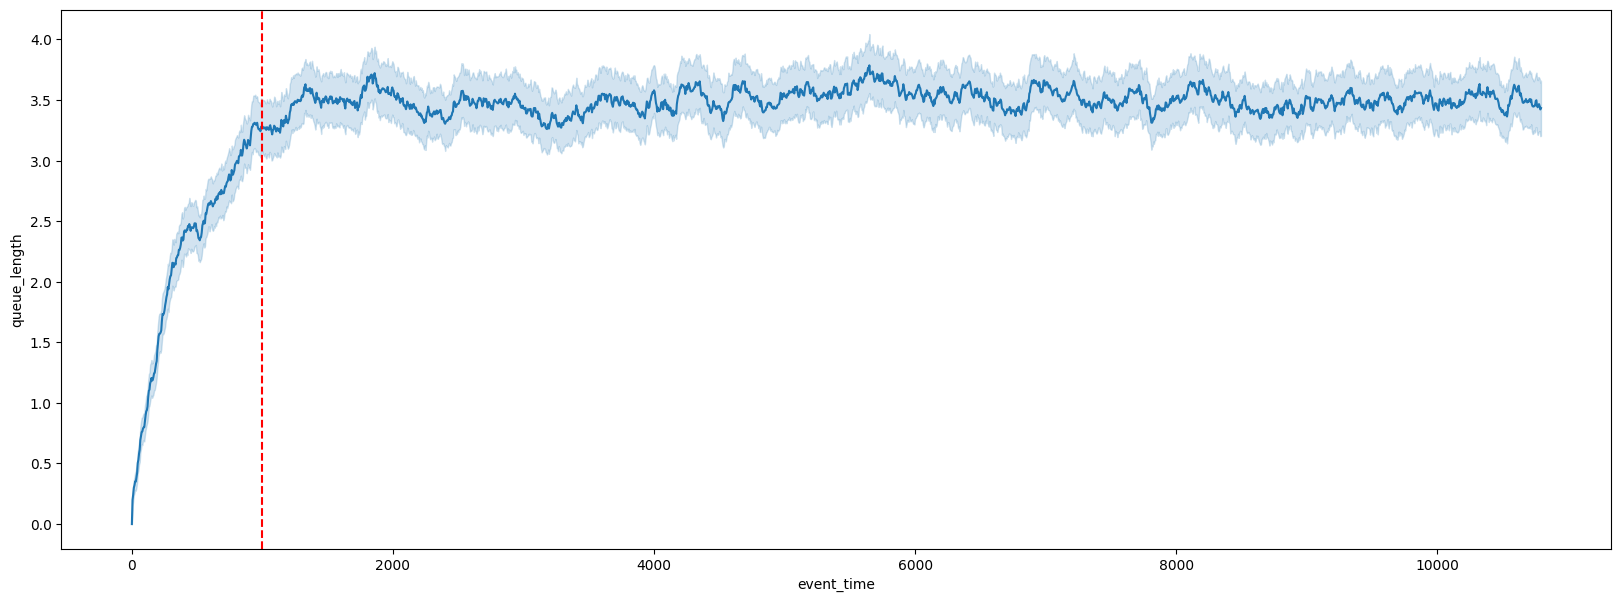

In [48]:
#Define the time point T1 (beginning of the steady state)
T1 = 1000

# get only the queue_monitor events
queue_data = events_RM_df[events_RM_df['event_name'] == 'queue_monitor']

#set figure size
f, ax = plt.subplots(1, figsize=(20, 7))

#plot the queue length over time
sns.lineplot(data=queue_data, x='event_time', y='queue_length', ax=ax)
plt.axvline(x=T1, color='r', linestyle='--')
plt.show()



The y-achsis represents the mean queue length and the x-axis represents the time in seconds. The shaded area represents the 95% confidence interval of the mean queue length.
* The visualisation shows the mean queue length over time. For example after 2000 seconds we can see that the mean queue length is approx 3.5 customers.
* Here we can see that approx the first 10% of the simulation run is the transient phase, where the queue length is still increasing before it has reached its steady state. 
* The steady state is then reached after approx 10% of the simulation run and the mean queue length fluctuates around 3.5 customers.


In [49]:
#Compute the point estimate of the mean queue length accross all replications
avg_queue_df = queue_data\
    .groupby('replication_id')\
    .agg({'queue_length': 'mean'})\
    .reset_index(drop=False)

point_estimator_with_transient = avg_queue_df['queue_length'].mean()
point_estimator_with_transient

3.379305555555556

In [50]:
#Compute the point estimate of the mean queue length accross all replications but deleting the first T1 minutes
avg_queue_df = queue_data\
    .loc[queue_data['event_time'] > T1]\
    .groupby('replication_id')\
    .agg({'queue_length': 'mean'})\
    .reset_index(drop=False)

point_estimator_without_transient = avg_queue_df['queue_length'].mean()
point_estimator_without_transient

3.4951975497702907

In [51]:
#Compare the point estimates
point_estimator_without_transient - point_estimator_with_transient


0.11589199421473495

* If we remove the transient phase from the simulation run, we can get a more accurate estimate of the mean queue length in the steady state. 
* This more accurate estimate is 0.11 customers higher as the steady state estimate with the transient phase included. 
* This is because the transient phase is the time where the queue length is still increasing.

### Output Analysis of Multiple Systems

The ice cream shop we are analyzing has always been the most popular in the area around the Mainbrücke. However, this year, a new ice cream shop, Cico, opened its second store right next to ours. Cico consistently has shorter waiting times and queues, which has led many customers to choose Cico over our shop. This shift has resulted in a loss of throughput for our ice cream shop.

One reason Cico might be faster and have shorter queues is because they always have two cashiers, regardless of the queue length. Therefore, we now want to compare our current system with a strategy of consistently having two cashiers. Our goal is to analyze whether this approach would be beneficial for the Mainbrücke icecream-shop to regain its lost customers and maximize its throughput.

<div style="display: flex; align-items: center; justify-content: space-between;">

<div style="flex: 1; text-align: center;">
    <img src="Mainbrücke.jpeg" alt="Mainbrücke" style="height: 200px;">
    <p>Mainbrücke Ice Cream Shop</p>
</div>

<div style="flex: 0; text-align: center; margin: 0 10px;">
    <p style="font-size: 24px;">vs</p>
</div>

<div style="flex: 1; text-align: center;">
    <img src="Cico.jpeg" alt="Cico" style="height: 200px;">
    <p>Cico Ice Cream Shop</p>
</div>

</div>


**System 1:**  1 Ice Cream Shop with 1 Cashier (increasing the number of cashiers to 2 or 3 if the queue length exceeds a certain threshold)


**System 2:** 1 Ice Cream Shop with constantly 2 cashiers and a common queue

#### Comparison of Two System Designs (CRN)

In [52]:
class EventLoggerSystemComparison:
    def __init__(self):
        self.logs = []
        self.replication = None  # replication number
        self.seed = None  # seed used for the replication
        self.system_id = None #used to identify the system in the logs
    
    def set_system_id(self, system_id):
        self.system_id = system_id
    
    def set_replication_info(self, replication, seed):
        self.replication = replication
        self.seed = seed

    def log_customer_arrival(self, entity, time, inter_arrival_time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                            'system_id': self.system_id,
                          'event_time': time, 'event_name': 'customer_arrival', 'event_key': entity, 
                          'inter_arrival_time': inter_arrival_time})
        

    def log_customer_service_start(self, entity, time, service_time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                          'system_id': self.system_id,
                          'event_time': time, 'event_name': 'customer_service_start', 'event_key': entity,
                            'service_time': service_time
                            })

    def log_customer_departure(self, entity, time):
        self.logs.append({'replication_id': self.replication, 'seed': self.seed,
                            'system_id': self.system_id,
                          'event_time': time, 'event_name': 'customer_departure', 'event_key': entity})

    def get_logs_df(self):
        return pd.DataFrame(self.logs)
    
    def dump_logs_df(self, filepath=None):
        if filepath is None: 
            filepath = "logs.csv"

        self.get_logs_df().to_csv(filepath, index=False)

In [53]:
class CustomerGeneratorCRN(CustomerGenerator):

    def __init__(self, env, ice_cream_shop, logger, iat_stream, st_stream):
        super().__init__(env, ice_cream_shop, logger, None, None)
        self.sample_number = 0
        self.iat_stream = iat_stream
        self.st_stream = st_stream

    def sample_iat_and_st(self):
        iat, st = self.iat_stream[self.sample_number], self.st_stream[self.sample_number]
        self.sample_number += 1
        return iat, st



In [54]:
# Simulation parameters
SIM_TIME = 60   # Simulation time in minutes
N_REPLICATIONS = 100  # Number of replications

# Setup and start the simulation
print('Running Simulation...')

# Define the logger (same for all replications)
logger = EventLoggerSystemComparison()


# Get a list of seeds of length N_REPLICATIONS from a pool of seeds.
# Set replace=False to ensure that we don't reuse the same seed twice.
list_of_seeds = pool_of_seeds[:N_REPLICATIONS]
list = range(1, N_REPLICATIONS)


# Run each replication
for i, seed in enumerate(list_of_seeds):
    print(f'Running Replication {i} with seed: {seed} ...')
    
    # Set random seed
    np.random.seed(seed)

    # Set replication id and random seed in logger
    logger.set_replication_info(i, seed)

    # Sample the inter-arrival time and service time
    iat_stream, st_stream = [], []

    for _ in range(500):
        iat, st = sample_iat_and_st(iat_ecdf, model_st)
        iat_stream.append(iat)
        st_stream.append(st)

        
     ######################################
    ############## SYSTEM 1 ##############
    ######################################

    # Create an environment and start the setup process
    env = simpy.Environment()

    # Set the system id to 1
    logger.set_system_id(1)
    
    # define resources
    ice_cream_shop = IceCreamShop(env, 1, logger, THRESHOLD_2, THRESHOLD_3)

    # define processes
    customer_generator = CustomerGeneratorCRN(
        env, ice_cream_shop, logger, iat_stream, st_stream
        )
    
    # Execute
    env.run(until=SIM_TIME*60)


    ######################################
    ############## SYSTEM 2 ##############
    ######################################

    # Create an environment and start the setup process
    env = simpy.Environment()

    # Set the system id to 2
    logger.set_system_id(2)

    # define resources
    ice_cream_shop = IceCreamShop(env, 2, logger, None, None)
    # define processes
    customer_generator = CustomerGenerator(
        env, ice_cream_shop, logger, iat_ecdf, model_st
        )
    
    # Execute
    env.run(until=SIM_TIME*60)


print('... Done')


Running Simulation...
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...


Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...
Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 with seed: 53859 ...
Running Replication 23 with seed: 19448 ...
Running Replication 24 with seed: 52420 ...
Running Replication 25 with seed: 14889 ...
Running Replication 26 with seed: 94205 ...
Running Replication 27 with seed: 94892 ...
Running Replication 28 with seed: 92731 ...
Running Replication 29 with seed: 29129 ...
Running Replication 30 with seed: 33430 ...
Running Replication 31 with seed: 84936 ...
Running Replication 32 with seed: 16

In [55]:
# Get the logs dataframe
events_df = logger.get_logs_df()
events_df

,replication_id,seed,system_id,event_time,event_name,event_key,inter_arrival_time,service_time
0,0,26003,1,35.000000,customer_arrival,Customer_1,35.0,NaN
1,0,26003,1,35.000000,customer_arrival,Customer_2,0.0,NaN
2,0,26003,1,35.000000,customer_service_start,Customer_1,NaN,0.000000
3,0,26003,1,35.000000,customer_arrival,Customer_3,0.0,NaN
4,0,26003,1,35.000000,customer_departure,Customer_1,NaN,NaN
...,...,...,...,...,...,...,...,...
50743,99,71222,2,3595.255319,customer_arrival,Customer_88,117.0,NaN
50744,99,71222,2,3595.255319,customer_arrival,Customer_89,0.0,NaN
50745,99,71222,2,3595.255319,customer_service_start,Customer_88,NaN,45.994162
50746,99,71222,2,3595.255319,customer_service_start,Customer_89,NaN,0.000000


In [56]:
# Get the events for system 1
events_system_1 = events_df[events_df['system_id'] == 1]
results_system_1 = format_events_df(events_system_1)

# Get the events for system 2
events_system_2 = events_df[events_df['system_id'] == 2]
results_system_2 = format_events_df(events_system_2)

In [57]:
# within replication stats for system 1
within_replication_stats_system_1 = results_system_1\
    .groupby('replication_id')\
    .agg({
        'waiting_time': ['mean', 'std'],
    })\
    .reset_index(drop=False)


# within replication stats for system 2
within_replication_stats_system_2 = results_system_2\
    .groupby('replication_id')\
    .agg({
        'waiting_time': ['mean', 'std'],
    })\
    .reset_index(drop=False)



In [58]:
within_replication_stats_system_1

replication_id waiting_time           
                          mean        std
0               0   238.671505  79.765662
1               1   120.404270  92.928877
2               2   146.721882  86.688361
3               3   163.650405  91.162784
4               4   178.402656  54.834208
..            ...          ...        ...
95             95   190.991825  98.075926
96             96   176.568571  78.023514
97             97   208.643011  89.861599
98             98   159.613527  71.403674
99             99   146.377845  79.938136

[100 rows x 3 columns]

In [59]:
within_replication_stats_system_2

replication_id waiting_time           
                          mean        std
0               0    59.364578  35.377896
1               1    54.297974  35.340770
2               2    50.469477  33.655793
3               3    62.823747  36.289831
4               4    77.841824  46.636760
..            ...          ...        ...
95             95    44.930014  33.696800
96             96    55.215439  37.915028
97             97    56.636774  38.876554
98             98    76.540049  50.670488
99             99    55.448117  40.707517

[100 rows x 3 columns]

Perform a 1 sample t-test to check if the mean waiting time of System 1 is significantly higher than the mean waiting time of System 2.

In [60]:
# Compare the means of the waiting time between the two systems
improvement = within_replication_stats_system_1['waiting_time']['mean'] - within_replication_stats_system_2['waiting_time']['mean']

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(improvement, 0, alternative='greater')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis; there is a significant improvement in the waiting time")


T-statistic: 37.60646395763244, P-value: 9.881113241256545e-61
Reject the null hypothesis; there is a significant improvement in the waiting time


As our t-test shows, there is a significant improvement in the waiting time in our second system.

#### Comparision of multiple system designs


In [61]:
hyperparameters = [
    # System 1: Thresholds for adding cashiers (add a cashier if the queue length is more than 3, add another if the queue length is more than 9)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 9},
    # System 2: Thresholds for adding cashiers (add a cashier if the queue length is more than 5, add another if the queue length is more than 9)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 5, 'threshold_for_3_cashiers': 9},
    # System 3: Thresholds for adding cashiers (add a cashier if the queue length is more than 7, add another if the queue length is more than 9)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 7, 'threshold_for_3_cashiers': 9},
    # System 4: Thresholds for adding cashiers (add a cashier if the queue length is more than 3, add another if the queue length is more than 7)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 7},
    # System 5: Thresholds for adding cashiers (add a cashier if the queue length is more than 5, add another if the queue length is more than 7)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 5, 'threshold_for_3_cashiers': 7},
    # System 6: Thresholds for adding cashiers (add a cashier if the queue length is more than 6, add another if the queue length is more than 7)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 6, 'threshold_for_3_cashiers': 7},
    # System 7: Thresholds for adding cashiers (add one cashier if the queue length is more than 3, add another if the queue length is more than 5)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 5},
    # System 8: Thresholds for adding cashiers (add one cashier if the queue length is more than 4, add another if the queue length is more than 5)
    {'num_cashier': 1, 'threshold_for_2_cashiers': 4, 'threshold_for_3_cashiers': 5},
    # System 9: Always use 2 cashiers
    {'num_cashier': 2, 'threshold_for_2_cashiers': None, 'threshold_for_3_cashiers': None},
    # System 10: Always use 3 cashiers
    {'num_cashier': 3, 'threshold_for_2_cashiers': None, 'threshold_for_3_cashiers': None},
]

    

In [62]:
# Simulation parameters
SIM_TIME = 60   # Simulation time in minutes
N_REPLICATIONS = 100  # Number of replications

# Setup and start the simulation
print('Running Simulation...')

# Define the logger (same for all replications)
logger = EventLoggerSystemComparison()



# Get a list of seeds of length N_REPLICATIONS from a pool of seeds.
# Set replace=False to ensure that we don't reuse the same seed twice.
list_of_seeds = pool_of_seeds[:N_REPLICATIONS]
list = range(1, N_REPLICATIONS)


# Run each replication
for i, seed in enumerate(list_of_seeds):
    print(f'Running Replication {i} with seed: {seed} ...')
    
    # Set random seed
    np.random.seed(seed)

    # Set replication id and random seed in logger
    logger.set_replication_info(i, seed)

    # Sample the inter-arrival time and service time
    iat_stream, st_stream = [], []

    for _ in range(500):
        iat, st = sample_iat_and_st(iat_ecdf, model_st)
        iat_stream.append(iat)
        st_stream.append(st)


    for system_id, hyperparameter in enumerate(hyperparameters, 1):

        # Create an environment and start the setup process
        env = simpy.Environment()

        # Set the system id
        logger.set_system_id(system_id)

        num_cashier = hyperparameter['num_cashier']
        threshold_for_2_cashiers = hyperparameter['threshold_for_2_cashiers']
        threshold_for_3_cashiers = hyperparameter['threshold_for_3_cashiers']

       # define resources
        ice_cream_shop = IceCreamShop(env, num_cashier, logger, threshold_for_2_cashiers, threshold_for_3_cashiers)

        # define processes
        customer_generator = CustomerGeneratorCRN(
            env, ice_cream_shop, logger, iat_stream, st_stream
            )

        # Execute
        env.run(until=SIM_TIME*60)
        

print('... Done')


Running Simulation...
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...
Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...


Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 with seed: 53859 ...
Running Replication 23 with seed: 19448 ...
Running Replication 24 with seed: 52420 ...
Running Replication 25 with seed: 14889 ...
Running Replication 26 with seed: 94205 ...
Running Replication 27 with seed: 94892 ...
Running Replication 28 with seed: 92731 ...
Running Replication 29 with seed: 29129 ...
Running Replication 30 with seed: 33430 ...
Running Replication 31 with seed: 84936 ...
Running Replication 32 with seed: 16822 ...
Running Replication 33 with seed: 88422 ...
Running Replication 34 with seed: 15603 ...
Running Replication 35 with seed: 68821 ...
Running Replication 36 with seed: 69

In [63]:
# Get the logs dataframe
events_df = logger.get_logs_df()
events_df

,replication_id,seed,system_id,event_time,event_name,event_key,inter_arrival_time,service_time
0,0,26003,1,35.000000,customer_arrival,Customer_1,35.0,NaN
1,0,26003,1,35.000000,customer_arrival,Customer_2,0.0,NaN
2,0,26003,1,35.000000,customer_service_start,Customer_1,NaN,0.000000
3,0,26003,1,35.000000,customer_arrival,Customer_3,0.0,NaN
4,0,26003,1,35.000000,customer_departure,Customer_1,NaN,NaN
...,...,...,...,...,...,...,...,...
253633,99,71222,10,3522.031464,customer_departure,Customer_80,NaN,NaN
253634,99,71222,10,3529.160126,customer_departure,Customer_82,NaN,NaN
253635,99,71222,10,3535.255319,customer_arrival,Customer_84,54.0,NaN
253636,99,71222,10,3535.255319,customer_service_start,Customer_84,NaN,117.688278


In [64]:
# Formatting of outputs

results_system_1 = format_events_df(events_df[events_df['system_id'] == 1])
results_system_2 = format_events_df(events_df[events_df['system_id'] == 2])
results_system_3 = format_events_df(events_df[events_df['system_id'] == 3])
results_system_4 = format_events_df(events_df[events_df['system_id'] == 4])
results_system_5 = format_events_df(events_df[events_df['system_id'] == 5])
results_system_6 = format_events_df(events_df[events_df['system_id'] == 6])
results_system_7 = format_events_df(events_df[events_df['system_id'] == 7])
results_system_8 = format_events_df(events_df[events_df['system_id'] == 8])
results_system_9 = format_events_df(events_df[events_df['system_id'] == 9])
results_system_10 = format_events_df(events_df[events_df['system_id'] == 10])


def get_within_replication_stats(results_df):
    return results_df\
        .groupby('replication_id')\
        .agg({
            'waiting_time': ['mean', 'std'],
        })\
        .reset_index(drop=False)

# within replication stats for system 1
within_replication_stats_system_1 = get_within_replication_stats(results_system_1)
within_replication_stats_system_2 = get_within_replication_stats(results_system_2)
within_replication_stats_system_3 = get_within_replication_stats(results_system_3)
within_replication_stats_system_4 = get_within_replication_stats(results_system_4)
within_replication_stats_system_5 = get_within_replication_stats(results_system_5)
within_replication_stats_system_6 = get_within_replication_stats(results_system_6)
within_replication_stats_system_7 = get_within_replication_stats(results_system_7)
within_replication_stats_system_8 = get_within_replication_stats(results_system_8)
within_replication_stats_system_9 = get_within_replication_stats(results_system_9)
within_replication_stats_system_10 = get_within_replication_stats(results_system_10)



In [65]:
# Get the confidence interval for the mean waiting time for each system
def get_confidence_interval(data):
    sample_size = data.shape[0]
    sample_mean = data['waiting_time']['mean'].mean()
    sample_std = data['waiting_time']['mean'].std()

    # Calculate the t-value for a 95% confidence interval (two-sided)
    t_value = stats.t.ppf(1-0.05/2, sample_size - 1) 

    # Calculate the half-width of the confidence interval
    ci_halfwidth = t_value * sample_std / np.sqrt(sample_size)

    #calculate the lower and upper bounds of the confidence interval
    ci_lb = sample_mean - ci_halfwidth
    ci_ub = sample_mean + ci_halfwidth

    return ci_lb, ci_ub


ci_system_1 = get_confidence_interval(within_replication_stats_system_1)
ci_system_2 = get_confidence_interval(within_replication_stats_system_2)
ci_system_3 = get_confidence_interval(within_replication_stats_system_3)
ci_system_4 = get_confidence_interval(within_replication_stats_system_4)
ci_system_5 = get_confidence_interval(within_replication_stats_system_5)
ci_system_6 = get_confidence_interval(within_replication_stats_system_6)
ci_system_7 = get_confidence_interval(within_replication_stats_system_7)
ci_system_8 = get_confidence_interval(within_replication_stats_system_8)
ci_system_9 = get_confidence_interval(within_replication_stats_system_9)
ci_system_10 = get_confidence_interval(within_replication_stats_system_10)

In [66]:
ci_system_1

(133.9069612557057, 141.52344077602777)

System 1: {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 9}
System 2: {'num_cashier': 1, 'threshold_for_2_cashiers': 5, 'threshold_for_3_cashiers': 9}
System 3: {'num_cashier': 1, 'threshold_for_2_cashiers': 7, 'threshold_for_3_cashiers': 9}
System 4: {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 7}
System 5: {'num_cashier': 1, 'threshold_for_2_cashiers': 5, 'threshold_for_3_cashiers': 7}
System 6: {'num_cashier': 1, 'threshold_for_2_cashiers': 6, 'threshold_for_3_cashiers': 7}
System 7: {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 5}
System 8: {'num_cashier': 1, 'threshold_for_2_cashiers': 4, 'threshold_for_3_cashiers': 5}
System 9: {'num_cashier': 2, 'threshold_for_2_cashiers': None, 'threshold_for_3_cashiers': None}
System 10: {'num_cashier': 3, 'threshold_for_2_cashiers': None, 'threshold_for_3_cashiers': None}


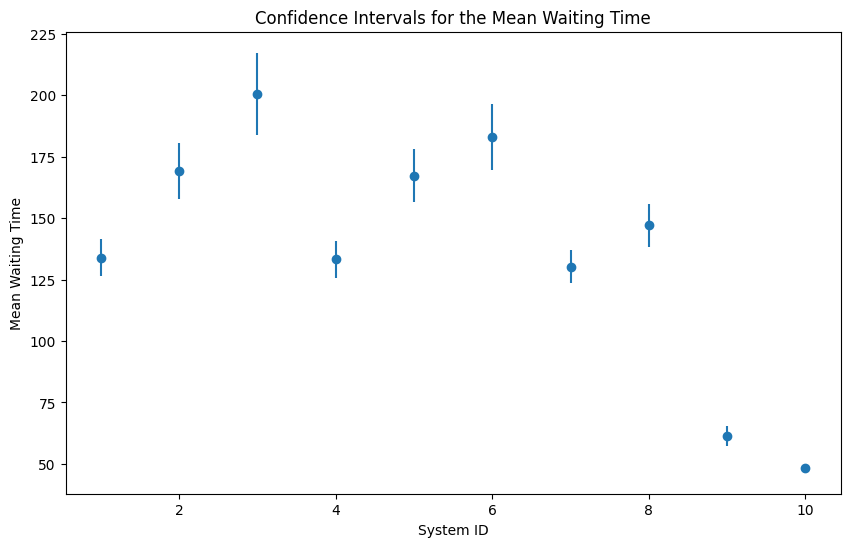

In [67]:
for system_id,params in enumerate(hyperparameters, 1):
    print(f"System {system_id}: {params}")


# Plot the confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
             y=[ci_system_1[0], ci_system_2[0], ci_system_3[0], ci_system_4[0], ci_system_5[0], ci_system_6[0], ci_system_7[0], ci_system_8[0], ci_system_9[0], ci_system_10[0]],
             yerr=[ci_system_1[1]-ci_system_1[0], ci_system_2[1]-ci_system_2[0], ci_system_3[1]-ci_system_3[0], ci_system_4[1]-ci_system_4[0], ci_system_5[1]-ci_system_5[0], ci_system_6[1]-ci_system_6[0], ci_system_7[1]-ci_system_7[0], ci_system_8[1]-ci_system_8[0], ci_system_9[1]-ci_system_9[0], ci_system_10[1]-ci_system_10[0]],
             fmt='o')

plt.xlabel('System ID')
plt.ylabel('Mean Waiting Time')
plt.title('Confidence Intervals for the Mean Waiting Time')
# save plot
plt.savefig('Confidence_Intervals.png')
plt.show()

In [68]:
# Best static system is model 7
print(f"""Best dynamic system is model 7 with a mean waiting time of {within_replication_stats_system_7['waiting_time']['mean'].mean()}
      and configuration: {hyperparameters[6]}
      """)


print(f"""The mean waiting time of system 9 with 2 cashiers is: {within_replication_stats_system_9['waiting_time']['mean'].mean()}""")
print(f"""The mean waiting time of system 10 with 3 cashiers is: {within_replication_stats_system_10['waiting_time']['mean'].mean()}""")

Best dynamic system is model 7 with a mean waiting time of 133.57658377925412
      and configuration: {'num_cashier': 1, 'threshold_for_2_cashiers': 3, 'threshold_for_3_cashiers': 5}
      
The mean waiting time of system 9 with 2 cashiers is: 63.32691307732755
The mean waiting time of system 10 with 3 cashiers is: 49.11886316973359


* For each system design, we have calculated the mean waiting time and the 95% confidence interval. 

* One system is better than the other with over 95% confidence if the confidence interval of the mean waiting time of the better system does not overlap with the confidence interval of the mean waiting time of the worse system.

* Example 1: System 10 (3 Cashiers) is better than System 1 (1 Cashier) with over 95% confidence because the confidence interval of the mean waiting time of System 10 does not overlap with the confidence interval of the mean waiting time of System 1.
Does not overlap means that the whole confidence interval of system 10 is under the whole confidence interval of system 1.

* Example 2: System 5 ('threshold_for_2_cashiers': 5, 'threshold_for_3_cashiers': ) is better than system 6 (threshold_for_2_cashiers': 6, 'threshold_for_3_cashiers': 7) as the point estimate of the mean waiting time of system 5 is lower than the point estimate of the mean waiting time of system 6. However, the confidence intervals of the two systems overlap, so we cannot say with over 95% confidence that system 5 is better than system 6. The probability that system 5 is better than system 6 is lower than 95% but it is still likely.
 

* The best system obivously is the one which uses 3 cashiers all the time. However, the system that is always using 2 cashiers almost as good as the one with 3 cashiers. 

* All dynamic systems are worse than the static system that is always using 2 cashiers.

* From the dyamic systems the best one are the one that using 2 cashiers if the queue length exceeds 3. The usage of the 3rd cashier has almost no effect on the waiting time.

#### Meta Model

In [69]:
# Convert the dicts into a DataFrame
X = pd.DataFrame(hyperparameters[:-2]).drop(columns=['num_cashier'])
X

,threshold_for_2_cashiers,threshold_for_3_cashiers
0,3,9
1,5,9
2,7,9
3,3,7
4,5,7
5,6,7
6,3,5
7,4,5


The regression model is represented by the following equation:

$$
average\ waiting\ time = b_0 + b_1 \cdot threshold\_for\_2\_cashiers + b_2 \cdot threshold\_for\_3\_cashiers + \epsilon
$$

where:
- $average waiting time$ is the dependent variable
- $b_0$ is the intercept
- $b_1$ is the slope coefficient (regression coefficient for threshold_for_2_cashiers)
- $b_2$ is the slope coefficient (regression coefficient for threshold_for_3_cashiers)
- $\epsilon $ is the error term (residuals) 


In [70]:
y = np.array([within_replication_stats_system_1['waiting_time']['mean'].mean(),
                within_replication_stats_system_2['waiting_time']['mean'].mean(),
                within_replication_stats_system_3['waiting_time']['mean'].mean(),
                within_replication_stats_system_4['waiting_time']['mean'].mean(),
                within_replication_stats_system_5['waiting_time']['mean'].mean(),
                within_replication_stats_system_6['waiting_time']['mean'].mean(),
                within_replication_stats_system_7['waiting_time']['mean'].mean(),
                within_replication_stats_system_8['waiting_time']['mean'].mean()])

y = pd.Series(y)
y

0    137.715201
1    174.845485
2    208.904239
3    136.927230
4    172.593387
5    189.625312
6    133.576584
7    151.441891
dtype: float64

In [71]:
# train a linear regression model
from  statsmodels.formula.api import ols

ols_model = ols('y ~ X', data=pd.concat([X, y], axis=1)).fit()

ols_model.summary()

/opt/miniconda3/envs/Sim/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4309.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           8.10e-09
Time:                        10:11:00   Log-Likelihood:                -7.5747
No. Observations:                   8   AIC:                             21.15
Df Residuals:                       5   BIC:                             21.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.0072      1.386     54.110      0.000      71.444      78.571
X[0]          17.7787      0.215     82.762      0.000      17.226      18.331
X[1]           1.1300      0.195      5.807      0.002       0.630       1.630
==============================================================================
Omnibus:                        3.069   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                0.904
Skew:                           0.132   Prob(JB):                        0.636
Kurtosis:                       1.375   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $R^2$ is 0.99, which is very good. This means that the model explains 99% of the variance in the data. This is a very high value and indicates that the model is a good fit for the data.

* $b_0:$ Intercept is 75. This means that if both thresholds are 0, the average waiting time is 75 seconds.
* $b_1:$ Threshold for using the 2nd cashier (Coefficient is 17.8) If this threshold is increased by 1, the waiting time increases by 17.8 on average
* $b_2:$ Threshold for using the 3rd cashier (Coefficient is 1.13) If this threshold is increased by 1, the waiting time increases by 1.13 on average

**Large impact of the 2nd cashier, small impact of the 3rd cashier**

## 8. Data & Decision (Conclusion)


### Analysis of Different Strategies

Since our goal is to maximize the throughput of customers by minimizing the waiting time, we recommend that the ice cream shop always have 2 cashiers, rather than using a dynamic cashier system. This strategy can significantly improve throughput for several reasons:

* **Consistently Shorter Queues:** With 2 cashiers always available, the ice cream shop can handle customer arrivals more efficiently, resulting in consistently shorter queues. Shorter queues mean that customers spend less time waiting to be served, which enhances their overall experience.

* **Reduced Waiting Time:** The primary factor affecting customer satisfaction and throughput is the waiting time. By having 2 cashiers at all times, the waiting time for each customer is minimized. This reduction in waiting time ensures that customers are served more quickly, allowing the shop to process more customers in the same amount of time.

* **Increased Customer Throughput:** With shorter queues and reduced waiting times, the ice cream shop can serve a higher number of customers per hour. This increased throughput directly translates to higher sales and revenue, as more customers can be accommodated and served efficiently.

* **Customer Retention:** Long queues can deter potential customers, leading them to leave or choose a competitor with shorter waiting times, such as the Cico ice cream shop. By maintaining shorter queues, the ice cream shop can retain more customers and prevent them from switching to competitors due to long wait times.

* **Enhanced Customer Experience:** A smooth and quick service experience is crucial for customer satisfaction. By ensuring that there are always 2 cashiers, the ice cream shop can provide a consistent and positive experience for customers, which can lead to repeat business and positive word-of-mouth recommendations.

* **Operational Stability:** A fixed number of cashiers creates a more predictable and stable operational environment. This stability can help in better workforce management and scheduling, reducing the complexity of dynamically adjusting the number of cashiers based on real-time demand.

In summary, by always having 2 cashiers, the ice cream shop can ensure shorter queues, reduced waiting times, and improved customer throughput. This approach not only enhances customer satisfaction but also helps in retaining customers and increasing sales, ultimately leading to a more successful and efficient operation.

In [72]:
# Filtere die Daten für 2 und 3 Kassierer
df_filtered_2Cashiers = df[df["Cashiers"] == 2]
df_filtered_3Cashiers = df[df["Cashiers"] == 3]

# Berechne die gesamte Zeitspanne, in der 2 Kassierer aktiv waren
start_time_2 = df_filtered_2Cashiers["Customer_Arrival_Time"].min()
end_time_2 = df_filtered_2Cashiers["Customer_Arrival_Time"].max()
total_minutes_2 = (end_time_2 - start_time_2).total_seconds() / 60

# Berechne die gesamte Zeitspanne, in der 3 Kassierer aktiv waren
start_time_3 = df_filtered_3Cashiers["Customer_Arrival_Time"].min()
end_time_3 = df_filtered_3Cashiers["Customer_Arrival_Time"].max()
total_minutes_3 = (end_time_3 - start_time_3).total_seconds() / 60

# Ein Kassierer verdient 15 Euro pro Stunde
hourly_rate = 15

# Der zweite Kassierer war total_minutes_3 + total_minutes_2 Minuten vor Ort
total_minutes_second_cashier = total_minutes_2 + total_minutes_3
cost_second_cashier = (total_minutes_second_cashier / 60) * hourly_rate

# Ein zusätzlicher Kassierer war total_minutes_3 Minuten vor Ort
cost_additional_cashier = (total_minutes_3 / 60) * hourly_rate

print(f"The costs for the second cashier within this hour are {cost_second_cashier:.2f} Euro.")
print(f"The costs for a third cashier within this hour are {cost_additional_cashier:.2f} Euro.")
print(f"The total costs for the additional cashiers are {cost_second_cashier + cost_additional_cashier } Euro.")


The costs for the second cashier within this hour are 5.25 Euro.
The costs for a third cashier within this hour are 1.02 Euro.
The total costs for the additional cashiers are 6.2625 Euro.


* Assuming our ice cream shop pays 15 euros per hour to the cashiers, the cost with the dynamic model would be 6.26 euros, whereas the cost for consistently having 2 cashiers would be 15 euros. 

* This implies that if the average revenue per customer is 3 euros, then if 3 or more customers choose our competitor because of the queue, the static model (with 2 cashiers) will be more cost-effective. 

* This is based on the assumption that reducing waiting time prevents these customers from leaving for the competitor.

### Sensitivity Analysis

Now we perform a sensitivity analysis to see if our optimal solution stays robust when the distribution of iat changes. Therefore we model the iat with a exponential distribution with different mean values.

In [73]:
class CustomerGenerator_Sensitivity(CustomerGenerator):
    def __init__(self, env, ice_cream_shop, logger, mean_iat, model_st):
        self.env = env
        self.ice_cream_shop = ice_cream_shop
        self.logger = logger
        self.mean_iat = mean_iat
        self.model_st = model_st # Model for the service time
        self.customer_count = 0
        self.env.process(self.customer_generator())


    def sample_iat_and_st(self):
        # Sample inter arrival time using an exponential distribution
        iat = np.random.exponential(self.mean_iat)

        st, iat = sample_st(iat, self.model_st)

        return iat, st




     

In [74]:
# Simulation parameters
SIM_TIME = 60  # Simulation time in minutes
N_REPLICATIONS = 50  # Number of replications

# Setup and start the simulation
print('Running Simulation...')

# Define the logger (same for all replications)
logger = EventLogger()


waiting_times = []


# Get a list of seeds of length N_REPLICATIONS from a pool of seeds.
# Set replace=False to ensure that we don't reuse the same seed twice.
list_of_seeds = pool_of_seeds[:N_REPLICATIONS]
list = range(1, N_REPLICATIONS)

# Epsilon is the change in the mean inter-arrival time
epsilon_values = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]
mean_inter_arrival_times =[(0.68 + epsilon)*60 for epsilon in epsilon_values]

for mean_iat in mean_inter_arrival_times:

    # Run each replication
    for i, seed in enumerate(list_of_seeds):
        print(f'Running Replication {i} with seed: {seed} ...')
        
        # Set random seed
        np.random.seed(seed)

        # Set replication id and random seed in logger
        logger.set_replication_info(i, seed)

        ######################################
        ############## SYSTEM 1 ##############
        ######################################

        # Create an environment and start the setup process
        env = simpy.Environment()
        
        # define resources
        ice_cream_shop = IceCreamShop(env, 2, logger, None, None)

        # define processes

        customer_generator = CustomerGenerator_Sensitivity(
            env, ice_cream_shop, logger, mean_iat, model_st
            )
        
        # Execute
        env.run(until=SIM_TIME*60)

    events_df = logger.get_logs_df()

    results_df = format_events_df(events_df)

    mean_waiting_time = results_df['waiting_time'].mean()

    waiting_times.append(mean_waiting_time)



    print('... Done')

Running Simulation...
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...
Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...
Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 w

... Done
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...
Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...
Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 with seed: 538

#### Compare to the best dynamic system (adding a second cashier if the queue length exceeds 3 and a third cashier if the queue length exceeds 5)

In [75]:
# Simulation parameters
SIM_TIME = 60  # Simulation time in minutes
N_REPLICATIONS = 50  # Number of replications

# Setup and start the simulation
print('Running Simulation...')

# Define the logger (same for all replications)
logger = EventLogger()


waiting_times_dynamic = []


# Get a list of seeds of length N_REPLICATIONS from a pool of seeds.
# Set replace=False to ensure that we don't reuse the same seed twice.
list_of_seeds = pool_of_seeds[:N_REPLICATIONS]
list = range(1, N_REPLICATIONS)

# Epsilon is the change in the mean inter-arrival time
epsilon_values = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]
mean_inter_arrival_times =[(0.68 + epsilon)*60 for epsilon in epsilon_values]

for mean_iat in mean_inter_arrival_times:

    # Run each replication
    for i, seed in enumerate(list_of_seeds):
        print(f'Running Replication {i} with seed: {seed} ...')
        
        # Set random seed
        np.random.seed(seed)

        # Set replication id and random seed in logger
        logger.set_replication_info(i, seed)

        ######################################
        ############## SYSTEM 1 ##############
        ######################################

        # Create an environment and start the setup process
        env = simpy.Environment()
        
        # define resources
        ice_cream_shop = IceCreamShop(env, 1, logger, 3, 5)

        # define processes

        customer_generator = CustomerGenerator_Sensitivity(
            env, ice_cream_shop, logger, mean_iat, model_st
            )
        
        # Execute
        env.run(until=SIM_TIME*60)

    events_df = logger.get_logs_df()

    results_df = format_events_df(events_df)

    mean_waiting_time = results_df['waiting_time'].mean()

    waiting_times_dynamic.append(mean_waiting_time)



    print('... Done')

Running Simulation...
Running Replication 0 with seed: 26003 ...
Running Replication 1 with seed: 80421 ...
Running Replication 2 with seed: 19865 ...
Running Replication 3 with seed: 81526 ...
Running Replication 4 with seed: 57879 ...
Running Replication 5 with seed: 79452 ...
Running Replication 6 with seed: 43084 ...
Running Replication 7 with seed: 80917 ...
Running Replication 8 with seed: 60765 ...
Running Replication 9 with seed: 52669 ...
Running Replication 10 with seed: 52487 ...
Running Replication 11 with seed: 81294 ...
Running Replication 12 with seed: 49346 ...
Running Replication 13 with seed: 16639 ...
Running Replication 14 with seed: 20425 ...
Running Replication 15 with seed: 90798 ...
Running Replication 16 with seed: 150 ...
Running Replication 17 with seed: 1762 ...
Running Replication 18 with seed: 50321 ...
Running Replication 19 with seed: 69161 ...
Running Replication 20 with seed: 87779 ...
Running Replication 21 with seed: 2496 ...
Running Replication 22 w

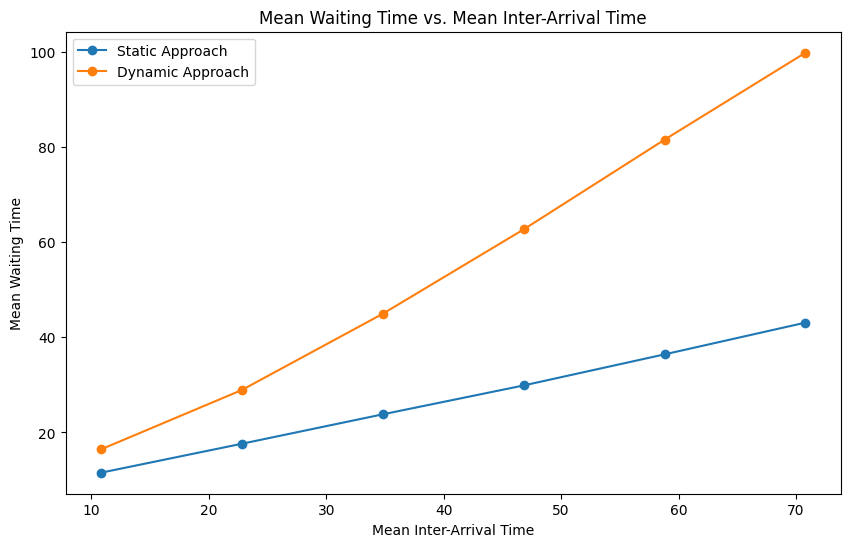

In [76]:
# Plot the waiting time against 0.68 + epsilon and compare the static and dynamic approach
plt.figure(figsize=(10, 6))

plt.plot(mean_inter_arrival_times, waiting_times, marker='o', label='Static Approach')
plt.plot(mean_inter_arrival_times, waiting_times_dynamic, marker='o', label='Dynamic Approach')

plt.xlabel('Mean Inter-Arrival Time')
plt.ylabel('Mean Waiting Time')
plt.title('Mean Waiting Time vs. Mean Inter-Arrival Time')
plt.legend()
plt.show()

* We performed a sensitivity analysis to compare the best dynamic system (use 2 cashiers if the queue length exceeds 3 and 3 cashiers if the queue length exceeds 5) with the static system that always uses 2 cashiers.

* We changed the mean inter-arrival time and compared the mean waiting time of the two systems.

* The mean waiting time the ice cream shop for the system with 2 cashier is always lower than the mean waiting time for the dynamic system. This shows that the static system is better than the dynamic system.

* So our optimal solution does not change. This is an indicator for the robustness of our model when analysing the optimal solution.

### Limitations and Future Work

* This simulation study is limited to data collected on a sunny day at 2 PM. To develop a more precise and robust model, additional data should be gathered across different days, times, and weather conditions.

* This broader dataset would allow for a more comprehensive analysis and improve the accuracy of the simulation.

* Additionally, the current model may not be robust enough to account for various unforeseen variables and anomalies (e.g., an unexpected festival in Würzburg leading to unusually high queues).

* Future work should focus on enhancing the model's robustness and incorporating a wider range of factors to ensure more reliable and generalizable results.